# Limpieza de los datos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/processed/data.csv', delimiter=',');
data

,#time,R4_Windgeschwindigkeit_B4_1Hz.Mean,R4_Windgeschwindigkeit_B4_1Hz.Stddev,R4_Windgeschwindigkeit_B4_1Hz.Min,R4_Windgeschwindigkeit_B4_1Hz.Max,R4_Windgeschwindigkeit_B4_1Hz.NVal,R4_Windgeschwindigkeit_B4_1Hz.Flag,R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag,R4_Windgeschwindigkeit_B4_1Hz.A4,R4_Windgeschwindigkeit_B4_1Hz.A3,...,R4_Azimutwinkel_B4_50Hz.Min,R4_Azimutwinkel_B4_50Hz.Max,R4_Azimutwinkel_B4_50Hz.NVal,R4_Azimutwinkel_B4_50Hz.Flag,R4_Azimutwinkel_B4_50Hz.Detailed_Flag,R4_Azimutwinkel_B4_50Hz.A4,R4_Azimutwinkel_B4_50Hz.A3,R4_Azimutwinkel_B4_50Hz.A2,R4_Azimutwinkel_B4_50Hz.A1,R4_Azimutwinkel_B4_50Hz.A0
0,2017-01-01 00:00:00.000,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,...,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 00:00:00.005,13.525400,1.068400,9.770350,17.224900,600.0,0,0,0.0,0.0,...,110.316000,122.384000,30000.0,0,0,0.0,0.0,0.0,1.000000,0.000000
2,2017-01-01 00:10:00.000,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,...,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 00:10:00.005,13.477100,1.005130,10.466800,17.613800,600.0,0,0,0.0,0.0,...,110.316000,123.549000,30000.0,0,0,0.0,0.0,0.0,1.000000,0.000000
4,2017-01-01 00:20:00.000,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,...,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470899,2020-12-31 23:10:00,2.680484,0.306436,1.642811,3.426617,600.0,1,10000999999999,0.0,0.0,...,327.460174,354.639774,30000.0,1,10000999999999,0.0,0.0,0.0,36.350785,31.324563
470900,2020-12-31 23:20:00,2.324961,0.301027,1.640675,3.126468,600.0,1,10000999999999,0.0,0.0,...,319.328481,351.633377,30000.0,1,10000999999999,0.0,0.0,0.0,36.350785,31.324563
470901,2020-12-31 23:30:00,2.068780,0.404824,1.244392,3.328348,600.0,1,10000999999999,0.0,0.0,...,322.323784,351.633377,30000.0,1,10000999999999,0.0,0.0,0.0,36.350785,31.324563
470902,2020-12-31 23:40:00,2.178742,0.426905,1.244392,3.232214,600.0,1,10000999999999,0.0,0.0,...,319.317387,322.368159,30000.0,1,10000999999999,0.0,0.0,0.0,36.350785,31.324563


## Reducción de features preliminar

Por un lado, durante el tiempo que ha transcurrido desde un instante al siguiente se va determinando los valores de velocidad del viento, dirección del viento, potencia activa y ángulo Yaw. Como consecuencia, se obtiene de cada instancia la media de todos los valores detectados, la desviación estándar, el mínimo y el máximo, de tal manera que los datos que interesan son aquellos que se encuentran en las columnas de la media. Luego podemos eliminar las demás columnas.
Por otro lado, las demás columnas contienen datos obtenidos por distintos sensores de los generadores los cuales no aportan ninguna información necesaria para la predicción y se pueden eliminar.

In [3]:
data = data.drop(columns=[' R4_Windgeschwindigkeit_B4_1Hz.Flag',' R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag',' R4_Windgeschwindigkeit_B4_1Hz.A4',
                            ' R4_Windgeschwindigkeit_B4_1Hz.A3',' R4_Windgeschwindigkeit_B4_1Hz.A2',' R4_Windgeschwindigkeit_B4_1Hz.A1',' R4_Windgeschwindigkeit_B4_1Hz.A0',
                            ' R4_elektrische_Leistung_B4_50Hz.Flag',' R4_elektrische_Leistung_B4_50Hz.Detailed_Flag',' R4_elektrische_Leistung_B4_50Hz.A4',' R4_elektrische_Leistung_B4_50Hz.A3',
                            ' R4_elektrische_Leistung_B4_50Hz.A2',' R4_elektrische_Leistung_B4_50Hz.A1',' R4_elektrische_Leistung_B4_50Hz.A0',' F1_dir(90).Detailed_Flag',' F1_dir(90).Flag',
                            ' F1_dir(90).A4',' F1_dir(90).A3',' F1_dir(90).A2',' F1_dir(90).A1',' F1_dir(90).A0',' R4_Azimutwinkel_B4_50Hz.Flag',' R4_Azimutwinkel_B4_50Hz.Detailed_Flag',
                            ' R4_Azimutwinkel_B4_50Hz.A4',' R4_Azimutwinkel_B4_50Hz.A3',' R4_Azimutwinkel_B4_50Hz.A2',' R4_Azimutwinkel_B4_50Hz.A1',' R4_Azimutwinkel_B4_50Hz.A0',
                            ' R4_Windgeschwindigkeit_B4_1Hz.Stddev',' R4_Windgeschwindigkeit_B4_1Hz.Min',' R4_Windgeschwindigkeit_B4_1Hz.Max',' R4_Windgeschwindigkeit_B4_1Hz.NVal',
                            ' R4_elektrische_Leistung_B4_50Hz.Stddev',' R4_elektrische_Leistung_B4_50Hz.Min',' R4_elektrische_Leistung_B4_50Hz.Max',' R4_elektrische_Leistung_B4_50Hz.NVal',
                            ' F1_dir(90).Stddev',' F1_dir(90).Min',' F1_dir(90).Max',' F1_dir(90).NVal',' R4_Azimutwinkel_B4_50Hz.Stddev',' R4_Azimutwinkel_B4_50Hz.Min',
                            ' R4_Azimutwinkel_B4_50Hz.Max',' R4_Azimutwinkel_B4_50Hz.NVal'])

Se modifica el nombre de las columnas restantes por uno más entendible.

In [4]:
data.columns = ['Time','WindSpeed','ActivePower','WindDirection','YawAngle']

## Información de los datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470904 entries, 0 to 470903
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           470904 non-null  object 
 1   WindSpeed      355464 non-null  float64
 2   ActivePower    352382 non-null  float64
 3   WindDirection  321896 non-null  float64
 4   YawAngle       352382 non-null  float64
dtypes: float64(4), object(1)
memory usage: 18.0+ MB


In [6]:
data.describe()

,WindSpeed,ActivePower,WindDirection,YawAngle
count,355464.000000,352382.000000,321896.000000,352382.000000
mean,8.795658,1825.295918,49734.334458,199.202471
std,4.486390,2200.859495,216957.463043,87.736428
min,-0.074108,-2305.490000,0.000000,0.077012
25%,5.499063,118.200770,136.993708,125.128000
50%,7.995713,1390.081047,219.326605,213.087230
75%,11.742775,3782.497455,277.504702,264.830698
max,29.761900,5237.710000,999999.000000,359.967000


## Valores nulos
Como los datos forman parte de una serie temporal, no se pueden eliminar los valores nulos. Por lo tanto, estos se imputan a su valor anterior.

In [7]:
columns = data.columns[1:]
for i in columns:
    data[i] = data[i].ffill()

Las columnas WindSpeed, ActivePower y YawAngle poseen un valor nulo en la primer posición, luego deberemos imputar este por separado.

In [8]:
columns = ['WindSpeed','ActivePower','YawAngle']
for i in columns:
    data[i][0] = data[i][1]

Además de los NaN, los valores nulos se pueden presentar como 9999, como es el caso de la dirección del viento.
Estos también se imputar a su valor anterior.

In [9]:
i = 0
while i < (len(data['WindDirection']) - 1):
    if (data['WindDirection'][i] >= 9999):
        data['WindDirection'][i] = data['WindDirection'][i-1]
    i += 1

## Outliers
Los valores de cada variable deben estar dentro de un rango de valores determinado. En este caso la velocidad del viento no puede ser inferior a cero, por lo tanto imputaremos los outliers a cero.

In [10]:
data['WindSpeed'][data['WindSpeed'] < 0] = 0

## Filas duplicadas

Se puede observar que el tiempo esta duplicado. Por ello, se procede a eliminar uno de ellos.

In [11]:
i = 0
indices = []
while i < (len(data['Time'])):
    if (data.iloc[i]['Time'][-2:] != '00'):
        indices.append(i) 
    i = i+1

data.drop(indices, axis=0, inplace=True) 
data.reset_index(drop=True, inplace=True)

Se modifican los valores de la columna tiempo para que todos sigan el formato 'yyyy-mm-dd hh:mm:ss'.

In [12]:
i = 0
while i < (len(data['Time'])):
    data['Time'][i] = data['Time'][i][:19]
    i += 1

## Visualización

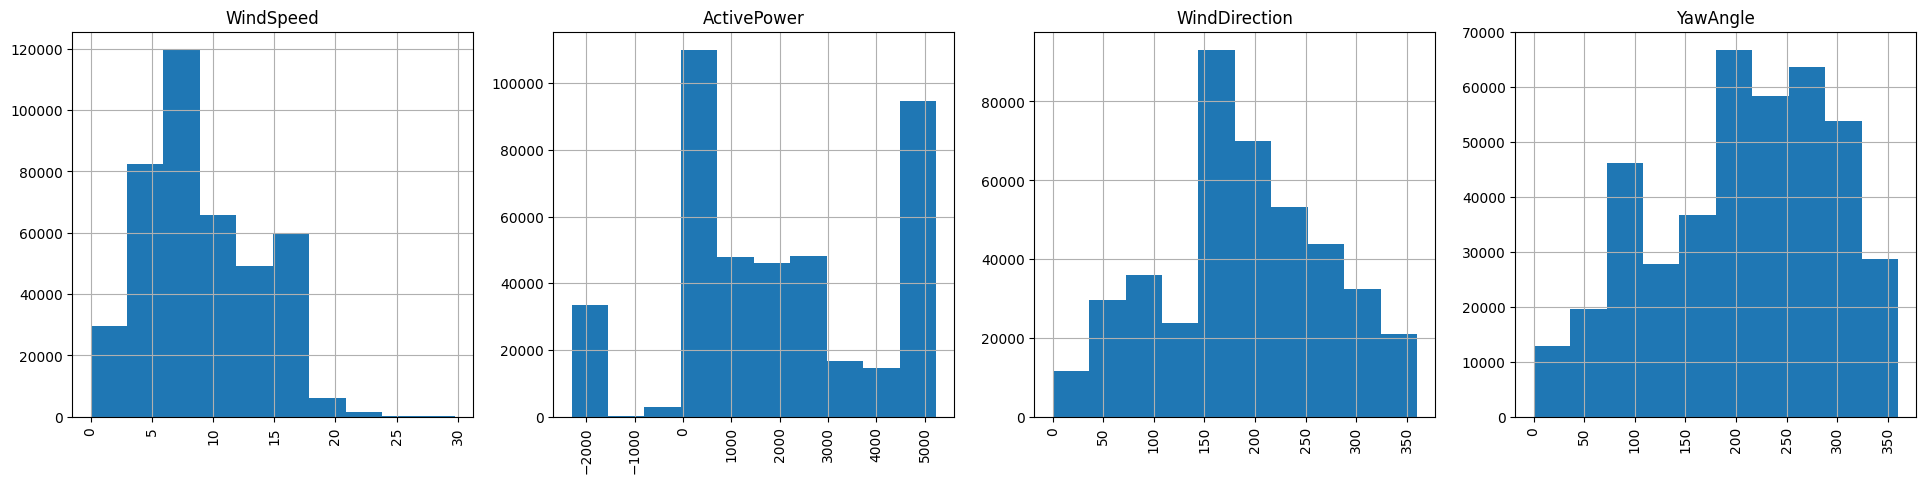

In [13]:
fig = plt.figure(figsize=(30, 5))
cols = 5
rows = int(np.ceil(float(data.shape[1]) / cols))
for i, column in enumerate(data.columns[1:]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [14]:
data.to_csv('../data/processed/clean_data.csv', index=False)